### Correlation Methods
This demo will show you several method of direct correlation method.    
Direct correlation is easy but less sensitive way for functional connection analysis.    
#### **Methods below includes**:
1. Seed point Correlation(window-slide)
    
2. Correlation matrix (window-slide)
    
3. Contralateral similarity calculation    
    
___

(18025, 330, 285)


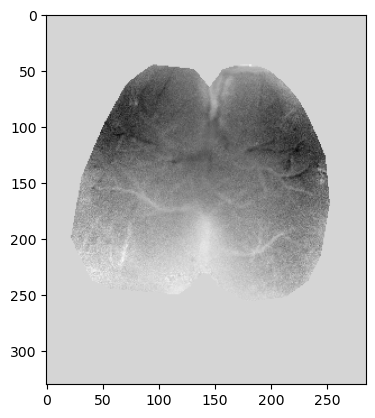

In [16]:
# import and basic path part
import Common_Functions as cf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
import pandas as pd
from Atlas_Corr_Tools import Atlas_Data_Tools,Contra_Similar
from Brain_Atlas.Atlas_Mask import Mask_Generator

wp = r'D:\ZR\_Data_Temp\Ois200_Data\Full_Demo\Wild_Type\Preprocessed'
series = np.load(cf.join(wp,'z_series.npy'))

# join chamber mask with brain area mask, getting only mask with values.
mask = cv2.imread(cf.join(wp,'Chamber_mask.png'),0)>0
joint_mask = (series.std(0)>0)*mask

# mask and clip input graph.
# NOTE this part is important for getting correct results.
series = np.clip(series,-3,3)*joint_mask
MG = Mask_Generator(bin=4)

print(series.shape)
plt.imshow(series[234,:,:],cmap='gray')
# plt.imshow(joint_mask)

___
- Part 1, Seed point corr.    
It's quite easy, provide a seed mask, corr with mask will be calculated.  
 
**This method will provide only long-term correlation, and nearby area have higher corr.**


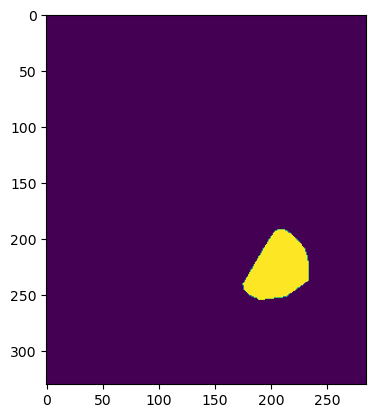

In [20]:
# first, you need to select a mask of seed. 
from OI_Functions.Seed_Functions import  *
seed_mask = MG.Get_Mask(area='VISp',LR='R')*joint_mask# you need this mask to get pix with value.

plt.imshow(seed_mask)

In [11]:
a = cf.Load_Variable(r'D:\ZR\_Data_Temp\Ois200_Data\Full_Demo\Wild_Type\Preprocessed','Area_Response_Heatmap.pkl')
a.index[0].split('_')[0]

'VISrl'